# IDS.131 Preliminary Analysis
Miranda, Jinghong, Yue, Charlie, Meia

In [1]:
from preprocess import *
from voronoi import create_voronoi

<Figure size 640x480 with 1 Axes>

In [2]:
import folium

## Preprocess

In [3]:
headers = get_headers(2018, 9)

# get the data we want to use
y2018 = {i+1: preprocess(2018, i+1) for i in range(9)}
y2017 = {i: preprocess(2017, i) for i in range(10,13)}

fullyear = np.vstack([month for month in {**y2017, **y2018}.values()])

# map of data column to what that column represents
index_map = {
    key: i for i, key in enumerate(headers)
}

# maps station ids to their respective latitudes and longitudes
station_coordinates = np.genfromtxt('station_coordinates.csv', delimiter=',')[1:]
map_station_coordinates = {int(row[0]): (row[1], row[2]) for row in station_coordinates}
print(headers)
print(index_map)

['tripduration', 'starttime', 'stoptime', 'startstationid', 'startstationname', 'startstationlatitude', 'startstationlongitude', 'endstationid', 'endstationname', 'endstationlatitude', 'endstationlongitude', 'bikeid', 'usertype', 'birthyear', 'gender"']
{'tripduration': 0, 'starttime': 1, 'stoptime': 2, 'startstationid': 3, 'startstationname': 4, 'startstationlatitude': 5, 'startstationlongitude': 6, 'endstationid': 7, 'endstationname': 8, 'endstationlatitude': 9, 'endstationlongitude': 10, 'bikeid': 11, 'usertype': 12, 'birthyear': 13, 'gender"': 14}


In [4]:
_ids = [int(i) for i in station_coordinates[:,0]]

In [5]:
aggregation = {}
for trip in fullyear:
    start, end = int(trip[index_map['startstationid']]), int(trip[index_map['endstationid']])
    if (start, end) not in aggregation:
        aggregation[(start, end)] = 1
    else:
        aggregation[(start, end)] += 1

In [23]:
def get_average_time_all(key):
    start, end = key
    specific_route = fullyear[np.where((fullyear[:,index_map['startstationid']] == str(start)) * (fullyear[:,index_map['endstationid']] == str(end)))]
    if specific_route.shape[0] > 0:
        return np.mean(specific_route[:,index_map['tripduration']].astype(int))/60.
    return 0

def get_average_time_subscribers(key):
    start, end = key
    specific_route = fullyear[np.where((fullyear[:,index_map['usertype']] == 'Subscriber') * (fullyear[:,index_map['startstationid']] == str(start)) * (fullyear[:,index_map['endstationid']] == str(end)))]
    return specific_route[:,index_map['tripduration']]
    #if specific_route.shape[0] > 0:
    #    return np.mean(specific_route[:,index_map['tripduration']].astype(int))/60.
    #return 0  

In [9]:
relevant = sorted(aggregation.items(), key=lambda kv: kv[1])[-600:]
relevant

[((35, 157), 414),
 ((60, 16), 415),
 ((39, 39), 415),
 ((47, 218), 416),
 ((95, 189), 416),
 ((186, 47), 416),
 ((53, 46), 416),
 ((25, 21), 417),
 ((6, 60), 417),
 ((40, 98), 417),
 ((68, 46), 417),
 ((81, 36), 418),
 ((23, 26), 418),
 ((119, 22), 419),
 ((55, 80), 419),
 ((189, 74), 420),
 ((163, 161), 420),
 ((180, 73), 421),
 ((35, 151), 421),
 ((226, 33), 422),
 ((36, 33), 422),
 ((58, 67), 423),
 ((47, 192), 423),
 ((4, 59), 423),
 ((21, 21), 423),
 ((60, 49), 424),
 ((89, 70), 425),
 ((22, 58), 426),
 ((189, 185), 427),
 ((35, 39), 427),
 ((97, 67), 427),
 ((36, 35), 427),
 ((46, 45), 428),
 ((16, 57), 428),
 ((39, 36), 429),
 ((73, 73), 429),
 ((60, 189), 430),
 ((70, 105), 430),
 ((57, 13), 430),
 ((7, 23), 431),
 ((135, 190), 432),
 ((81, 23), 433),
 ((26, 16), 433),
 ((192, 161), 434),
 ((16, 16), 435),
 ((139, 178), 435),
 ((179, 190), 435),
 ((91, 6), 436),
 ((58, 190), 436),
 ((206, 206), 436),
 ((71, 80), 437),
 ((108, 97), 438),
 ((69, 91), 438),
 ((88, 67), 439),
 ((2

In [10]:
relevant_dict = {key: val for key, val in relevant}

In [11]:
average_time = {key: get_average_time_subscribers(key) for key, amount in relevant}

In [43]:
times = get_average_time_subscribers((39, 46)).astype(int)/60

filtered = times[np.where(times < 1000)]
len(filtered)
np.mean(filtered)

8.849548532731378

In [12]:
short = {key: val for key, val in average_time.items() if val > 0 and val < 10}
medium = {key: val for key, val in average_time.items() if val >=10 and val < 20 and key[0] != key[1]}
long = {key: val for key, val in average_time.items() if val >=20 and key[0] != key[1]}

In [13]:
s = list(short.items())[-5:]
s

[((67, 179), 5.827268518518519),
 ((179, 80), 6.441454133268562),
 ((178, 80), 5.792522459727385),
 ((67, 53), 4.5235368956743),
 ((53, 67), 4.776219235567654)]

In [44]:
m = list(medium.items())[-6:]
m

[((74, 67), 17.92899865591398),
 ((64, 190), 10.812288411458333),
 ((39, 22), 11.162954034072644),
 ((189, 190), 10.334019795657726),
 ((67, 74), 15.789035861258082),
 ((22, 190), 14.149510542168676)]

In [15]:
l = list(long.items())[-5:]
l

[((80, 78), 23.32140062597809),
 ((39, 46), 176.53415915915915),
 ((133, 124), 21.711008861622357),
 ((4, 22), 39.57221333333334),
 ((80, 190), 25.653640951694303)]

In [16]:
ids = set()
for ls in [s, m, l]:
    for key in ls:
        ids.add(key[0][0])
        ids.add(key[0][1])
print(ids)
print(len(ids))
print({i: map_station_coordinates[i] for i in ids})

{64, 67, 4, 133, 39, 74, 78, 46, 80, 178, 179, 53, 22, 124, 189, 190}
16
{64: (-71.04930013, 42.3510045), 67: (-71.093198, 42.3581), 4: (-71.069616, 42.345392), 133: (-71.107341, 42.310579), 39: (-71.07404083, 42.3385146), 74: (-71.118579, 42.373268), 78: (-71.0938704, 42.37980718), 46: (-71.08582377, 42.34366582), 80: (-71.09115601, 42.36213123), 178: (-71.10129476, 42.3595732), 179: (-71.10394478, 42.35560121), 53: (-71.08981088, 42.35082681), 22: (-71.055547, 42.352175), 124: (-71.11543, 42.309054), 189: (-71.08495474, 42.36242784), 190: (-71.064263, 42.365673)}


In [19]:
m = folium.Map([42.337102, -71.1], tiles='Stamen Terrain', zoom_start=12, max_zoom=18)
for _id, coords in map_station_coordinates.items():
    folium.CircleMarker(
        [coords[1], coords[0]],
        radius = 1,
        popup=f'{_id}',
    ).add_to(m)
m

In [18]:
m = folium.Map([42.337102, -71.1], tiles='Stamen Terrain', zoom_start=12, max_zoom=18)

folium.CircleMarker(
    (42.3385146, -71.07404083),
    radius = 1,
    popup=f'{39}',
).add_to(m)

folium.CircleMarker(
    (42.34366582, -71.08582377),
    radius = 1,
    popup=f'{46}',
).add_to(m)
    
    
m

## Get most common routes

In [20]:
most_common = sorted(aggregation.items(), key=lambda kv: kv[1])[-40:]
print(f'Most common routes: {most_common}')
most_common_stations = set()
for route, count in most_common:
    most_common_stations.add(route[0])
    most_common_stations.add(route[1])
print(f'Most common stations comprising the most popular 10 routes {most_common_stations}')

Most common routes: [((67, 107), 1364), ((68, 179), 1410), ((22, 190), 1426), ((80, 190), 1429), ((53, 80), 1444), ((22, 20), 1506), ((179, 189), 1527), ((189, 179), 1599), ((67, 189), 1628), ((40, 22), 1636), ((67, 67), 1671), ((146, 146), 1676), ((107, 179), 1810), ((58, 58), 1811), ((189, 67), 1867), ((80, 67), 1875), ((68, 67), 1900), ((107, 178), 1926), ((22, 40), 2000), ((80, 68), 2106), ((179, 107), 2183), ((178, 68), 2185), ((178, 107), 2236), ((67, 80), 2249), ((189, 178), 2385), ((178, 189), 2637), ((67, 68), 2752), ((68, 178), 2816), ((118, 100), 2841), ((67, 178), 2858), ((100, 118), 2874), ((80, 179), 3019), ((179, 67), 3444), ((178, 67), 3465), ((80, 178), 3563), ((67, 179), 4053), ((179, 80), 4196), ((178, 80), 4322), ((67, 53), 5852), ((53, 67), 6066)]
Most common stations comprising the most popular 10 routes {67, 68, 100, 40, 107, 80, 146, 179, 20, 53, 22, 178, 118, 58, 189, 190}


## All Rides


In [21]:
time_spent = []
for route in most_common:
    start, end = route[0][0], route[0][1]
    specific_route = fullyear[np.where((fullyear[:,index_map['startstationid']] == str(start)) * (fullyear[:,index_map['endstationid']] == str(end)))]
    m = np.mean(specific_route[:,index_map['tripduration']].astype(int))/60.
    print(f"route {route[0]} with {route[1]} rides has average time spent {m} in minutes")
    time_spent.append(m)
print(f'time spent: {time_spent}')

route (67, 107) with 1364 rides has average time spent 6.554105571847507 in minutes
route (68, 179) with 1410 rides has average time spent 9.245035460992908 in minutes
route (22, 190) with 1426 rides has average time spent 14.655832164562879 in minutes
route (80, 190) with 1429 rides has average time spent 25.405784931187313 in minutes
route (53, 80) with 1444 rides has average time spent 7.416216528162511 in minutes
route (22, 20) with 1506 rides has average time spent 10.175121735281097 in minutes
route (179, 189) with 1527 rides has average time spent 8.822800698537437 in minutes
route (189, 179) with 1599 rides has average time spent 9.505753595997499 in minutes
route (67, 189) with 1628 rides has average time spent 13.448914823914825 in minutes
route (40, 22) with 1636 rides has average time spent 12.2635391198044 in minutes
route (67, 67) with 1671 rides has average time spent 26.75365050867744 in minutes
route (146, 146) with 1676 rides has average time spent 51.409437151949085 

## Just Subscriber Rides

In [22]:
time_spent = []
for route in most_common:
    start, end = route[0][0], route[0][1]
    specific_route = fullyear[np.where((fullyear[:,index_map['usertype']] == 'Subscriber')*(fullyear[:,index_map['startstationid']] == str(start)) * (fullyear[:,index_map['endstationid']] == str(end)))]
    m = np.mean(specific_route[:,index_map['tripduration']].astype(int))/60.
    print(f"route {route[0]} with {route[1]} rides has average time spent {m} in minutes")
    time_spent.append(m)
print(f'time spent: {time_spent}')

route (67, 107) with 1364 rides has average time spent 5.913120290984671 in minutes
route (68, 179) with 1410 rides has average time spent 8.824624291697463 in minutes
route (22, 190) with 1426 rides has average time spent 14.149510542168676 in minutes
route (80, 190) with 1429 rides has average time spent 25.653640951694303 in minutes
route (53, 80) with 1444 rides has average time spent 7.186128955507971 in minutes
route (22, 20) with 1506 rides has average time spent 7.562965722801788 in minutes
route (179, 189) with 1527 rides has average time spent 8.557731130993346 in minutes
route (189, 179) with 1599 rides has average time spent 9.06433928965365 in minutes
route (67, 189) with 1628 rides has average time spent 6.8224590869939705 in minutes
route (40, 22) with 1636 rides has average time spent 7.97641926220455 in minutes
route (67, 67) with 1671 rides has average time spent 19.731272893772893 in minutes
route (146, 146) with 1676 rides has average time spent 28.524925816023735 i

## Voronoi Diagram of Boston Bike sharing

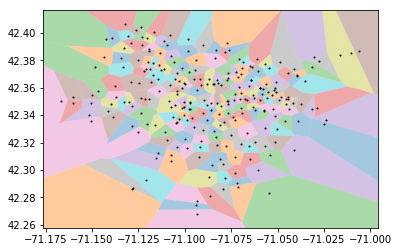

In [28]:
vor, regions, vertices = create_voronoi()

## Map of Boston and Bike Stops

## Plot Most Common Routes

In [174]:
coords = [int(i) for i in station_coordinates[:, 0]]
regions = {int(i): vor.vertices[vor.regions[vor.point_region[coords.index(i)]]] for i in station_coordinates[:,0]}
regions[1]

array([[-71.06547386,  42.39065807],
       [-71.07524748,  42.38235189],
       [-71.07826644,  42.3892397 ],
       [-71.06431423,  42.39332503]])

In [302]:
for i in (64, 190, 39, 22, 189, 74, 78, 46, 133, 124, 4):

    print(f'{i}: {regions[i]}')

64: [[-71.0494267   42.34683506]
 [-71.0472115   42.3495281 ]
 [-71.04752327  42.3514623 ]
 [-71.05088796  42.3532062 ]
 [-71.0524269   42.35157192]
 [-71.05299263  42.34855267]]
190: [[-71.0592639   42.36682252]
 [-71.06021345  42.36410324]
 [-71.06183769  42.36281525]
 [-71.06655548  42.36389071]
 [-71.0615095   42.36826662]]
39: [[-71.07290898  42.34244813]
 [-71.07736301  42.33801185]
 [-71.07617823  42.33627854]
 [-71.07074632  42.33876711]]
22: [[-71.05773029  42.35304016]
 [-71.05668348  42.34815764]
 [-71.05506712  42.34779416]
 [-71.05299263  42.34855267]
 [-71.0524269   42.35157192]
 [-71.05546384  42.3544646 ]
 [-71.05603163  42.35448195]]
189: [[-71.08672246  42.35635091]
 [-71.08473797  42.35552021]
 [-71.0842535   42.3554849 ]
 [-71.0838514   42.35556057]
 [-71.08347353  42.35767266]
 [-71.08501792  42.36476021]
 [-71.08655415  42.363967  ]]
74: [[-71.11654482  42.37517509]
 [-71.11567713  42.37390084]
 [-71.11595183  42.37190201]
 [-71.11955752  42.37063067]
 [-71.119697

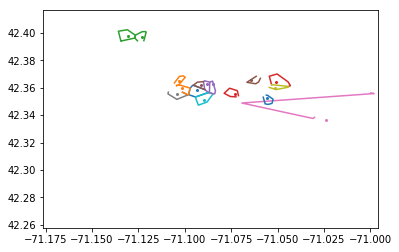

In [194]:
plt.xlim(-71.176491, -70.99609799999999)
plt.ylim(42.257902, 42.416301999999995)
for station in most_common_stations:
    plt.scatter(map_station_coordinates[station][0], map_station_coordinates[station][1], s=4)
    plt.plot(regions[station][:,0], regions[station][:, 1])

In [24]:
m2 = folium.Map([42.337102, -71.1], tiles='Stamen Terrain', zoom_start=12, max_zoom=18)
for station in most_common_stations:
    folium.CircleMarker(
        (map_station_coordinates[station][1], map_station_coordinates[station][0]),
        radius = 1,
        popup=f'{station}',
    ).add_to(m2)
m2

In [25]:
m2 = folium.Map([42.337102, -71.1], tiles='Stamen Terrain', zoom_start=12, max_zoom=18)
for station in [74, 67]:
    folium.CircleMarker(
        (map_station_coordinates[station][1], map_station_coordinates[station][0]),
        radius = 1,
        popup=f'{_id}',
    ).add_to(m2)
m2

## Station Usage Heat Maps

### For trips during month of sept 2018

In [4]:
morning = (4,10)  # inclusive, so from 4am to 11am.
evening = (16,19)  # inclusive, from 4pm to 8pm

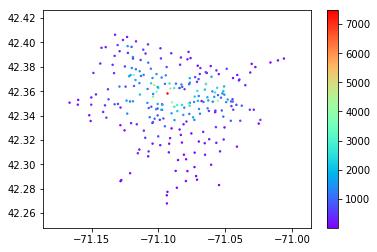

In [48]:
plot_station_use_heat_map(y2018[9], start=True)  # stations where the most trips originate for september 2018

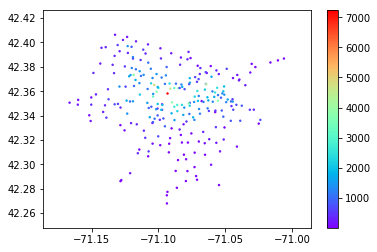

In [7]:
plot_station_use_heat_map(y2018[9], start=False)  # stations where the most trips end for september 2018

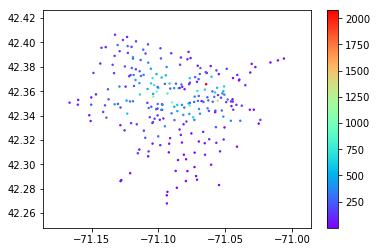

In [8]:
plot_station_use_heat_map(y2018[9], morning, True)  # morning commute origination (starting from 4am to 11am) for september 2018

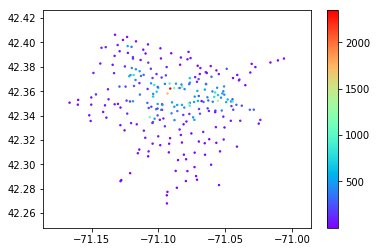

In [9]:
plot_station_use_heat_map(y2018[9], morning, False)  # morning commute destinations (starting from 4am to 11am) for september 2018

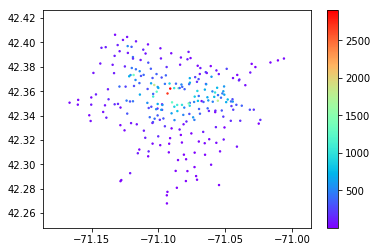

In [10]:
plot_station_use_heat_map(y2018[9], evening, True)  # evening commute origination (4pm to 8pm) for september 2018

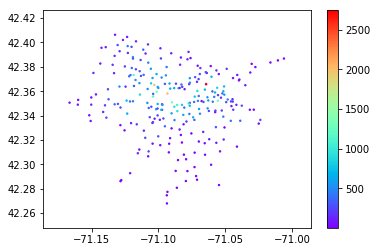

In [11]:
plot_station_use_heat_map(y2018[9], evening, False)  # evening commute destinations (4pm to 8pm) for september 2018

### Heat maps for rides from full past year: oct 2017 - sept 2018 (inclusive)

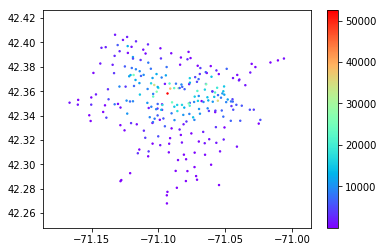

In [12]:
plot_station_use_heat_map(fullyear, start=True)  # stations where the most trips originate for october 2017 to september 2018

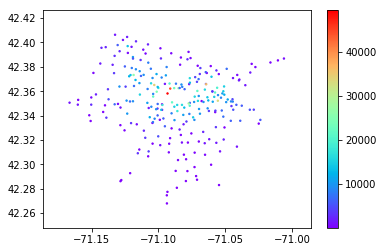

In [13]:
plot_station_use_heat_map(fullyear, start=False)  # stations where the most trips end for october 2017 to september 2018

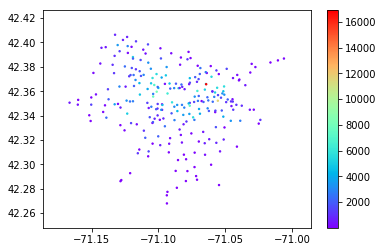

In [14]:
plot_station_use_heat_map(fullyear, morning, True)  # morning commute origination (starting from 4am to 11am)

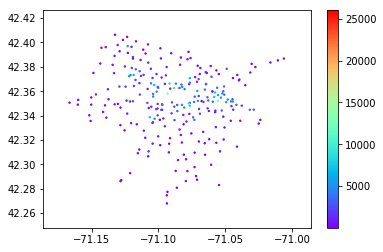

In [15]:
plot_station_use_heat_map(fullyear, morning, False)  # morning commute destinations (starting from 4am to 11am)

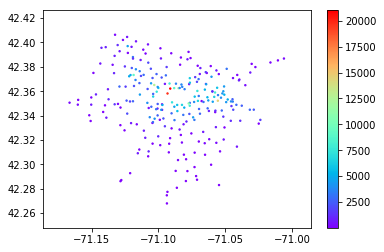

In [16]:
plot_station_use_heat_map(fullyear, evening, True)  # evening commute origination (4pm to 8pm)

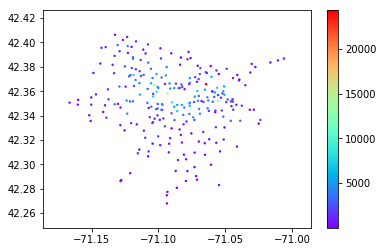

In [17]:
plot_station_use_heat_map(fullyear, evening, False)  # evening commute destinations (4pm to 8pm)

## Analytics of percentage of riders that are subscribers

In [18]:
unique, count = np.unique(fullyear[:,index_map['usertype']], return_counts=True)
print(unique)
print(count)

['Customer' 'Subscriber']
[ 307377 1381146]


In [19]:
diff_start_end = fullyear[fullyear[:,index_map['startstationid']]  != fullyear[:,index_map['endstationid']]]

In [20]:
unique, count = np.unique(diff_start_end[:,index_map['usertype']], return_counts=True)

In [21]:
print(unique, count)

['Customer' 'Subscriber'] [ 272408 1353960]
